In [12]:
import time
import numpy as np
import pandas as pd
import requests 
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:

Twelve_columns = ['version' , 'year' , 'engine' , 'current_mileage' , 'hand' , 'gearBox' , 'color' , 'original_onership' , 'next_test_in' , 'annual_licensing_fee' , "car_length" , 'price']

cars = pd.read_csv(r"C:\Users\avoav\JupyterProjects\project-semester-a\cars_urls_data.csv" ,index_col=0 )

df_Det = pd.DataFrame( columns= Twelve_columns)
counter = 0
for url in cars['url']:
    
    one_car = requests.get(url)
    soup = BeautifulSoup(one_car.content , 'html.parser')
     
   
    try:
        blocks = soup.find ('div',  xs = 'auto' )
        block = blocks.get_text()
        price = block.replace('\u200f', '').replace('\xa0₪', '').replace(',', '').replace('הצעת הסוכנותמחיר' , '')
        int(price)

    #if there is some urls which is not represented cars...
    except:
        print ("An exception occurred")
        continue

    #the length:     
    blocks1 = soup.select ('p' , tabindex_="0" )
    counter = 1
    for block in blocks1 :
        if (block.text == "אורך (ס''מ)"):
            length = blocks1[counter].text
        counter = counter+1
    
    Det = soup.select('td' , class_='MuiTableCell-root MuiTableCell-body MuiTableCell-alignLeft MuiTableCell-paddingNone')
        
    det_array = []

# choose only the second td each time?
    
    for i in range(len(Det)):
        if (i%2 != 0):
            det_array.append(Det[i].get_text())

    det_array.append(length)
    det_array.append(int(price)) 
    
#we choose only the cars which has all parameters:

    if (len(det_array) ==12):
        df_det_array = pd.DataFrame(np.array([det_array]) , columns = Twelve_columns  ) 
    
    #how to append data with different number of columns 
    df_Det = pd.concat([df_Det ,df_det_array] , ignore_index = True , sort = False).fillna(0)
    counter = counter +1
    if (counter % 300 == 0) : print(counter)

df_Det.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\new_cars_data.csv' , index_label='index' )


An exception occurred
An exception occurred
An exception occurred


ChunkedEncodingError: ("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read))

In [21]:
#df_Det.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\new_cars_data.csv' , index_label='index' )
new_cars = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\new_cars_data.csv' , index_col  = 'index')

In [22]:
new_cars

,version,year,engine,current_mileage,hand,gearBox,color,original_onership,next_test_in,annual_licensing_fee,car_length,price
index,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,2021,1498 ליטר בנזין,"10,000",1,אוטומטי,לבן,פרטית,5 חודשים,"‏2,417 ₪",445.0,176000
1,טויוטה קורולה GLI,2011,1598 ליטר בנזין,"71,000",2,אוטומטי,כסף,פרטית,4 חודשים,"‏1,262 ₪",454.5,45000
2,טויוטה קורולה GLI,2011,1598 ליטר בנזין,"71,000",2,אוטומטי,כסף,פרטית,4 חודשים,"‏1,262 ₪",454.5,45000
3,קיה פיקנטו LX,2020,1248 ליטר בנזין,"16,500",2,אוטומטי,לבן,פרטית,9 חודשים,"‏1,235 ₪",359.5,79900
4,הונדה סיוויק COMFORT,2014,1798 ליטר בנזין,"144,000",2,אוטומטי,אפור,חברה,2 חודשים,"‏1,424 ₪",430.0,44900
...,...,...,...,...,...,...,...,...,...,...,...,...
1049,לנד רובר רינג' רובר ספורט PHEV AB DYN,2020,1997 ליטר חשמל/בנזין,"45,000",2,אוטומטי,לבן,פרטית,1 חודשים,"‏4,731 ₪",487.9,590000
1050,פיאט פנדה DYNAMIC,2011,1242 ליטר בנזין,"84,000",2,ידני,צהוב,פרטית,1 חודשים,‏880 ₪,353.8,13000
1051,ג'יפ צ'ירוקי LONGITUDE,2015,3239 ליטר בנזין,"180,000",4,אוטומטי,לבן,פרטית,6 חודשים,"‏1,962 ₪",462.4,79999


In [32]:

df_Det.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_label='index' )


In [15]:
cars = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_col  = 'index')

In [64]:
cars_f4719 = pd.read_csv(r"C:\Users\avoav\JupyterProjects\project-semester-a\cars_urls_data.csv" ,index_col=0 )
cars_f4719 = cars_f4719.iloc[4719:,:]
cars_f4719

df_Det = pd.DataFrame( columns= Twelve_columns)
counter = 0
for url in cars_f4719['url']:
    
    one_car = requests.get(url)
    soup = BeautifulSoup(one_car.content , 'html.parser')
     
   
    try:
        blocks = soup.find ('div',  xs = 'auto' )
        block = blocks.get_text()
        price = block.replace('\u200f', '').replace('\xa0₪', '').replace(',', '').replace('הצעת הסוכנותמחיר' , '')
        int(price)

    #if there is some urls which is not represented cars...
    except:
        print ("An exception occurred")
        continue

    #the length:     
    blocks1 = soup.select ('p' , tabindex_="0" )
    counter = 1
    for block in blocks1 :
        if (block.text == "אורך (ס''מ)"):
            length = blocks1[counter].text
        counter = counter+1
    
    Det = soup.select('td' , class_='MuiTableCell-root MuiTableCell-body MuiTableCell-alignLeft MuiTableCell-paddingNone')
        
    det_array = []
# how to choose only the second td each time?
    
    for i in range(len(Det)):
        if (i%2 != 0):
            det_array.append(Det[i].get_text())

    det_array.append(length)
    det_array.append(int(price)) 
    
#we choose only the cars which has all parameters:

    if (len(det_array) ==12):
        df_det_array = pd.DataFrame(np.array([det_array]) , columns = Twelve_columns  ) 
    
    #how to append data with different number of columns 
    df_Det = pd.concat([df_Det ,df_det_array] , ignore_index = True , sort = False).fillna(0)
    counter = counter +1
    if (counter % 300 == 0) : print(counter)

df_Det.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\new1_cars_data.csv' , index_label='index' )


An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred


In [69]:
new_cars.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\new_cars2_data.csv' , index_label  = 'index')

In [65]:
df_Det.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\new_cars1_data.csv' , index_label  = 'index')
new_cars1 = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\new_cars1_data.csv' , index_col  = 'index')
new_cars = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\new_cars_data.csv' , index_col  = 'index')
new_cars = pd.concat([new_cars, new_cars1] ,  ignore_index = True  )

new_cars.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\new_cars_data.csv' , index_label  = 'index')


In [72]:
new_cars = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\new_cars_data.csv' , index_col  = 'index')

new_cars = new_cars.drop_duplicates()

new_cars.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\new_cars_data.csv' , index_label  = 'index')

In [16]:

cars.info()
#success just 965 urls so we will return the process from url number 1000. and 2000.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 0 to 2200
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   version               2201 non-null   object
 1   year                  2201 non-null   int64 
 2   CompanyName           2201 non-null   object
 3   engine                2201 non-null   object
 4   current_mileage       2201 non-null   object
 5   hand                  2201 non-null   int64 
 6   gearBox               2201 non-null   int64 
 7   color                 2201 non-null   object
 8   original_onership     2201 non-null   object
 9   next_test_in          2201 non-null   int64 
 10  annual_licensing_fee  2201 non-null   int64 
 11  price                 2201 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 223.5+ KB


In [27]:
cars_f1000 = pd.read_csv(r"C:\Users\avoav\JupyterProjects\project-semester-a\cars_urls_data.csv" ,index_col=0 )
cars_f1000 = cars_f1000.iloc[1001:,:]
cars_f1000

,url
1001,https://carwiz.co.il/used-cars/04b86adc-b3c0-4...
1002,https://carwiz.co.il/used-cars/ce2a4faa-edab-4...
1003,https://carwiz.co.il/used-cars/216d5923-7b52-4...
1004,https://carwiz.co.il/used-cars/5244efa2-61ae-4...
1005,https://carwiz.co.il/used-cars/46f1ad87-2459-4...
...,...
3004,https://carwiz.co.il/used-cars/c47779ca-0b0c-4...
3005,https://carwiz.co.il/used-cars/997a0799-3db4-4...
3006,https://carwiz.co.il/used-cars/fdb72a7a-55a4-4...
3007,https://carwiz.co.il/used-cars/4a9e2a74-7b9c-4...


In [29]:
df_Det = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_col  = 'index')
counter = 0
for url in cars_f1000['url']:
    
    one_car = requests.get(url)
    soup = BeautifulSoup(one_car.content , 'html.parser')
     
   
    try:
        blocks = soup.find ('div',  xs = 'auto' )
        block = blocks.get_text()
        price = block.replace('\u200f', '').replace('\xa0₪', '').replace(',', '').replace('הצעת הסוכנותמחיר' , '')
        int(price)

    #if there is some urls which is not represented cars...
    except:
        print ("An exception occurred")
        continue
    
    Det = soup.select('td' , class_='MuiTableCell-root MuiTableCell-body MuiTableCell-alignLeft MuiTableCell-paddingNone')
        
    det_array = []
# how to choose only the second td each time?
    
    for i in range(len(Det)):
        if (i%2 != 0):
            det_array.append(Det[i].get_text())
    
    det_array.append(int(price)) 
    
#we choose only the cars which has all parameters:

    if (len(det_array) ==11):
        df_det_array = pd.DataFrame(np.array([det_array]) , columns = eleven_columns  ) 
    
    #how to append data with different number of columns 
    df_Det = pd.concat([df_Det ,df_det_array] , ignore_index = True , sort = False).fillna(0)
    counter = counter +1
    if (counter % 300 == 0) : print(counter)

df_Det.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_label='index' )


An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
300
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
600
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
900
An exception occurred
An exception occurred
An exception occurred
An exception occurred


ChunkedEncodingError: ("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read))

In [51]:
cars_f2000 = pd.read_csv(r"C:\Users\avoav\JupyterProjects\project-semester-a\cars_urls_data.csv" ,index_col=0 )
cars_f2000 = cars_f2000.iloc[2001:,:]
cars_f2000

,url
2001,https://carwiz.co.il/used-cars/ab01cd1c-16f5-4...
2002,https://carwiz.co.il/used-cars/265f1094-4a00-4...
2003,https://carwiz.co.il/used-cars/e05b494a-5a3e-4...
2004,https://carwiz.co.il/used-cars/b46d8adc-2cd3-4...
2005,https://carwiz.co.il/used-cars/4fb7b060-9899-4...
...,...
3004,https://carwiz.co.il/used-cars/c47779ca-0b0c-4...
3005,https://carwiz.co.il/used-cars/997a0799-3db4-4...
3006,https://carwiz.co.il/used-cars/fdb72a7a-55a4-4...
3007,https://carwiz.co.il/used-cars/4a9e2a74-7b9c-4...


In [52]:
df_Det = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_col  = 'index')
counter = 0
for url in cars_f2000['url']:
    
    one_car = requests.get(url)
    soup = BeautifulSoup(one_car.content , 'html.parser')
     
   
    try:
        blocks = soup.find ('div',  xs = 'auto' )
        block = blocks.get_text()
        price = block.replace('\u200f', '').replace('\xa0₪', '').replace(',', '').replace('הצעת הסוכנותמחיר' , '')
        int(price)

    #if there is some urls which is not represented cars...
    except:
        print ("An exception occurred")
        continue
    
    Det = soup.select('td' , class_='MuiTableCell-root MuiTableCell-body MuiTableCell-alignLeft MuiTableCell-paddingNone')
        
    det_array = []
# how to choose only the second td each time?
    
    for i in range(len(Det)):
        if (i%2 != 0):
            det_array.append(Det[i].get_text())
    
    det_array.append(int(price)) 
    
#we choose only the cars which has all parameters:

    if (len(det_array) ==11):
        df_det_array = pd.DataFrame(np.array([det_array]) , columns = eleven_columns  ) 
    
    #how to append data with different number of columns 
    df_Det = pd.concat([df_Det ,df_det_array] , ignore_index = True , sort = False).fillna(0)
    counter = counter +1
    if (counter % 300 == 0) : print(counter)

df_Det.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_label='index' )


An exception occurred
An exception occurred
An exception occurred
300
An exception occurred
An exception occurred
An exception occurred
An exception occurred


ChunkedEncodingError: ("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read))

In [46]:
df_Det.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_label='index' )

In [73]:
cars = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\new_cars_data.csv' , index_col  = 'index')

In [74]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 4905
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   version               3002 non-null   object 
 1   year                  3002 non-null   int64  
 2   engine                3002 non-null   object 
 3   current_mileage       3002 non-null   object 
 4   hand                  3002 non-null   int64  
 5   gearBox               3002 non-null   object 
 6   color                 3002 non-null   object 
 7   original_onership     3002 non-null   object 
 8   next_test_in          3002 non-null   object 
 9   annual_licensing_fee  3002 non-null   object 
 10  car_length            3002 non-null   float64
 11  price                 3002 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 304.9+ KB


In [75]:
#we have got 2057 cars but just 573 different types. so we need to try to get more...
len(cars.version.unique())

928

In [85]:
cars.version.unique()
#we saw here that we need to split the "version" column to two columns : "CompanyName" and "version":
CompanyName = cars['version'].apply(lambda x : x.split(' ')[0])
cars.insert(1,"CompanyName",CompanyName)
cars

,version,CompanyName,year,engine,current_mileage,hand,gearBox,color,original_onership,next_test_in,annual_licensing_fee,car_length,price
0,קופרה פורמנטור SILVER STORM,קופרה,2021,1498 ליטר בנזין,"10,000",1,אוטומטי,לבן,פרטית,5 חודשים,"‏2,417 ₪",445.0,176000
1,טויוטה קורולה GLI,טויוטה,2011,1598 ליטר בנזין,"71,000",2,אוטומטי,כסף,פרטית,4 חודשים,"‏1,262 ₪",454.5,45000
2,קיה פיקנטו LX,קיה,2020,1248 ליטר בנזין,"16,500",2,אוטומטי,לבן,פרטית,9 חודשים,"‏1,235 ₪",359.5,79900
3,הונדה סיוויק COMFORT,הונדה,2014,1798 ליטר בנזין,"144,000",2,אוטומטי,אפור,חברה,2 חודשים,"‏1,424 ₪",430.0,44900
4,פיאט 500 1.2 POP STAR,פיאט,2017,1242 ליטר בנזין,"69,000",1,אוטומטי,לבן,פרטית,2 חודשים,"‏1,353 ₪",357.1,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,סקודה קודיאק AMBITION,סקודה,2017,1395 ליטר בנזין,"159,800",1,אוטומטי,זהב,ליסינג,5 חודשים,"‏2,019 ₪",448.0,132000
2998,סקודה פאביה AMBITION,סקודה,2016,1197 ליטר בנזין,"140,000",3,אוטומטי,שחור מטלי,ליסינג,4 חודשים,"‏1,102 ₪",399.2,59000
2999,מאזדה 3,מאזדה,2020,1998 ליטר בנזין,"14,500",1,אוטומטי,אפור,פרטית,11 חודשים,"‏2,130 ₪",466.0,130500
3000,קרייזלר PT-CRUISE LIMITED,קרייזלר,2008,2429 ליטר בנזין,"163,000",3,אוטומטי,אחר,פרטית,3 חודשים,"‏1,427 ₪",429.0,17000


In [83]:
cars = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\new_cars_data.csv' , index_col  = 'index')
cars = cars.reset_index(drop=True)
cars

,version,year,engine,current_mileage,hand,gearBox,color,original_onership,next_test_in,annual_licensing_fee,car_length,price
0,קופרה פורמנטור SILVER STORM,2021,1498 ליטר בנזין,"10,000",1,אוטומטי,לבן,פרטית,5 חודשים,"‏2,417 ₪",445.0,176000
1,טויוטה קורולה GLI,2011,1598 ליטר בנזין,"71,000",2,אוטומטי,כסף,פרטית,4 חודשים,"‏1,262 ₪",454.5,45000
2,קיה פיקנטו LX,2020,1248 ליטר בנזין,"16,500",2,אוטומטי,לבן,פרטית,9 חודשים,"‏1,235 ₪",359.5,79900
3,הונדה סיוויק COMFORT,2014,1798 ליטר בנזין,"144,000",2,אוטומטי,אפור,חברה,2 חודשים,"‏1,424 ₪",430.0,44900
4,פיאט 500 1.2 POP STAR,2017,1242 ליטר בנזין,"69,000",1,אוטומטי,לבן,פרטית,2 חודשים,"‏1,353 ₪",357.1,42900
...,...,...,...,...,...,...,...,...,...,...,...,...
2997,סקודה קודיאק AMBITION,2017,1395 ליטר בנזין,"159,800",1,אוטומטי,זהב,ליסינג,5 חודשים,"‏2,019 ₪",448.0,132000
2998,סקודה פאביה AMBITION,2016,1197 ליטר בנזין,"140,000",3,אוטומטי,שחור מטלי,ליסינג,4 חודשים,"‏1,102 ₪",399.2,59000
2999,מאזדה 3,2020,1998 ליטר בנזין,"14,500",1,אוטומטי,אפור,פרטית,11 חודשים,"‏2,130 ₪",466.0,130500
3000,קרייזלר PT-CRUISE LIMITED,2008,2429 ליטר בנזין,"163,000",3,אוטומטי,אחר,פרטית,3 חודשים,"‏1,427 ₪",429.0,17000


In [59]:
#there is some names we want to set right:
# לנד == לנד רובר
# אלפא = אלפא רומיאו
#we also need to change all names to english so we do that together:

car_names = cars.CompanyName.unique()
i=0
for item in car_names:
    if (item == "אלפא"): 
        car_names[i] = 'alfa-romeo'  
    elif (item =='ניסאן'): 
        car_names[i] = 'nissan'
    elif (item == "מאזדה"): 
        car_names[i] = 'mazda'
    elif (item == "סובארו"): 
        car_names[i] = 'subaru'
    elif (item == "מרצדס"): 
        car_names[i] = 'mercedes'
    elif (item == "סיאט"): 
        car_names[i] = 'siat'   
    elif (item == "סיטרואן"): 
        car_names[i] = 'citroen'   
    elif (item == "טויוטה"): 
        car_names[i] = 'toyota'   
    elif (item =="ג'יפ"): 
        car_names[i] = 'jeep'   
    elif (item == "קיה"): 
        car_names[i] = 'kia'   
    elif (item == "יונדאי"): 
        car_names[i] = 'hyundai'   
    elif (item == "דייהטסו"): 
        car_names[i] = 'daihatsu'   
    elif (item == "פורשה"): 
        car_names[i] = 'porsche'   
    elif (item == "פיאט"): 
        car_names[i] = 'fiat'   
    elif (item == "פורד"): 
        car_names[i] = 'ford'   
    elif (item == "סוזוקי"): 
        car_names[i] = 'suzuki'   
    elif (item == "דאצ'יה"): 
        car_names[i] = 'dacia'   
    elif (item == "ב.מ.וו"): 
        car_names[i] = 'bmw'   
    elif (item == "פיג'ו"): 
        car_names[i] = 'peugeot'   
    elif (item == "מיצובישי"): 
        car_names[i] = 'mitsubishi'   
    elif (item == "פולקסווגן"): 
        car_names[i] = 'volkswagen'   
    elif (item == "רנו"): 
        car_names[i] = 'reno' 
    elif (item == "הונדה"): 
        car_names[i] = 'honda' 
    elif (item == "אאודי"): 
        car_names[i] = 'audi' 
    elif (item == "סקודה"): 
        car_names[i] = 'skoda' 
    elif (item == "מיני"): 
        car_names[i] = 'mini' 
    elif (item == "אינפיניטי"): 
        car_names[i] = 'infinity'
    elif (item == "לנד"): 
        car_names[i] = 'landrover' 
    elif (item == "שברולט"): 
        car_names[i] = 'chevrolet'
    elif (item == "אופל"): 
        car_names[i] = 'opel'
    elif (item == "MG"): 
        car_names[i] = 'MG'
    elif (item == "טסלה"): 
        car_names[i] = 'tesla'
    elif (item == "'דודג"): 
        car_names[i] = 'dodge'
    elif (item == "ביואיק"): 
        car_names[i] = 'buick'
    elif (item == "יגואר"): 
        car_names[i] = 'jaguar'   
    elif (item == "לקסוס"): 
        car_names[i] = 'lexus' 
    elif (item == "סמארט"): 
        car_names[i] = 'smart'
    elif (item == "סאנגיונג"): 
        car_names[i] = 'sangiang'
    elif (item == "קאדילק"): 
        car_names[i] = 'cadillac'
    elif (item == "קופרה"): 
        car_names[i] = 'cupra'   
    elif (item == "קרייזלר"): 
        car_names[i] = 'chrysler'
    elif (item == "מזארטי"): 
        car_names[i] = 'maserati' 
    elif (item == "וולבו"): 
        car_names[i] = 'volvo'
    elif (item == "איסוזו"): 
        car_names[i] = 'isuzu'
    elif (item == "GMC"): 
        car_names[i] = 'gmc'   
    else:
        item = "mazda" # one of the popular cars... 
    i= i+1   


print(car_names)

['ford' 'nissan' 'subaru' 'mercedes' 'toyota' 'jeep' 'hyundai' 'mazda'
 'alfa-romeo' 'daihatsu' 'porsche' 'fiat' 'citroen' 'suzuki' 'dacia' 'bmw'
 'siat' 'peugeot' 'volkswagen' 'reno' 'honda' 'audi' 'skoda' 'mitsubishi'
 'mini' 'infinity' 'kia' 'landrover' 'chevrolet']


In [60]:
# now, we want to change the column "CompanyName" :
def item_to_E (item):
    if (item in car_names):
        return item
    if (item == "אלפא"): 
        item = 'alfa-romeo'  
    elif (item =='ניסאן'): 
        item = 'nissan'
    elif (item == "מאזדה"): 
        item = 'mazda'
    elif (item == "סובארו"): 
        item = 'subaru'
    elif (item == "מרצדס"): 
        item = 'mercedes'
    elif (item == "סיאט"): 
        item = 'siat'   
    elif (item == "סיטרואן"): 
        item = 'citroen'   
    elif (item == "טויוטה"): 
        item = 'toyota'   
    elif (item =="ג'יפ"): 
        item = 'jeep'   
    elif (item == "קיה"): 
        item = 'kia'   
    elif (item == "יונדאי"): 
        item = 'hyundai'   
    elif (item == "דייהטסו"): 
        item = 'daihatsu'   
    elif (item == "פורשה"): 
        item = 'porsche'   
    elif (item == "פיאט"): 
        item = 'fiat'   
    elif (item == "פורד"): 
        item = 'ford'   
    elif (item == "סוזוקי"): 
        item = 'suzuki'   
    elif (item == "דאצ'יה"): 
        item = 'dacia'   
    elif (item == "ב.מ.וו"): 
        item = 'bmw'   
    elif (item == "פיג'ו"): 
        item = 'peugeot'   
    elif (item == "מיצובישי"): 
        item = 'mitsubishi'   
    elif (item == "פולקסווגן"): 
        item = 'volkswagen'   
    elif (item == "רנו"): 
        item = 'reno' 
    elif (item == "הונדה"): 
        item = 'honda' 
    elif (item == "אאודי"): 
        item = 'audi' 
    elif (item == "סקודה"): 
        item = 'skoda' 
    elif (item == "מיני"): 
        item = 'mini' 
    elif (item == "אינפיניטי"): 
        item = 'infinity'
    elif (item == "לנד"): 
        item = 'landrover' 
    elif (item == "שברולט"): 
        item = 'chevrolet'
    elif (item == "אופל"): 
        item = 'opel'
    elif (item == "MG"): 
        item = 'MG'
    elif (item == "טסלה"): 
        item = 'tesla'
    elif (item == "'דודג"): 
        item = 'dodge'
    elif (item == "ביואיק"): 
        item = 'buick'
    elif (item == "יגואר"): 
        item = 'jaguar'   
    elif (item == "לקסוס"): 
        item = 'lexus' 
    elif (item == "סמארט"): 
        item = 'smart'
    elif (item == "סאנגיונג"): 
        item = 'sangiang'
    elif (item == "קאדילק"): 
        item = 'cadillac'
    elif (item == "קופרה"): 
        item = 'cupra'   
    elif (item == "קרייזלר"): 
        item = 'chrysler'
    elif (item == "מזארטי"): 
        item = 'maserati' 
    elif (item == "וולבו"): 
        item = 'volvo'
    elif (item == "איסוזו"): 
        item = 'isuzu'
    elif (item == "GMC"): 
        item = 'gmc'
    else:
        item = "mazda" # one of the popular cars... 
    return item

cars['CompanyName'].apply(item_to_E)

0           ford
1         nissan
2         subaru
3         subaru
4       mercedes
         ...    
236          bmw
237          kia
238    chevrolet
239      hyundai
240          bmw
Name: CompanyName, Length: 241, dtype: object

In [89]:
cars.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_label  = 'index')

In [90]:
cars = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_col  = 'index')
cars

,version,CompanyName,year,engine,current_mileage,hand,gearBox,color,original_onership,next_test_in,annual_licensing_fee,car_length,price
index,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,קופרה,2021,1498 ליטר בנזין,"10,000",1,אוטומטי,לבן,פרטית,5 חודשים,"‏2,417 ₪",445.0,176000
1,טויוטה קורולה GLI,טויוטה,2011,1598 ליטר בנזין,"71,000",2,אוטומטי,כסף,פרטית,4 חודשים,"‏1,262 ₪",454.5,45000
2,קיה פיקנטו LX,קיה,2020,1248 ליטר בנזין,"16,500",2,אוטומטי,לבן,פרטית,9 חודשים,"‏1,235 ₪",359.5,79900
3,הונדה סיוויק COMFORT,הונדה,2014,1798 ליטר בנזין,"144,000",2,אוטומטי,אפור,חברה,2 חודשים,"‏1,424 ₪",430.0,44900
4,פיאט 500 1.2 POP STAR,פיאט,2017,1242 ליטר בנזין,"69,000",1,אוטומטי,לבן,פרטית,2 חודשים,"‏1,353 ₪",357.1,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,סקודה קודיאק AMBITION,סקודה,2017,1395 ליטר בנזין,"159,800",1,אוטומטי,זהב,ליסינג,5 חודשים,"‏2,019 ₪",448.0,132000
2998,סקודה פאביה AMBITION,סקודה,2016,1197 ליטר בנזין,"140,000",3,אוטומטי,שחור מטלי,ליסינג,4 חודשים,"‏1,102 ₪",399.2,59000
2999,מאזדה 3,מאזדה,2020,1998 ליטר בנזין,"14,500",1,אוטומטי,אפור,פרטית,11 חודשים,"‏2,130 ₪",466.0,130500


In [93]:
#add more data:
#big_cars_d = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\big_cars_data.csv' , index_col  = 'index')
#cars = cars.concat([cars ,big_cars_d] , ignore_index = True , sort = False).fillna(0)

In [91]:
#change the "gearBox" column to number:
cars.replace({'gearBox': 'ידני' } ,2 , inplace = True)

cars.replace({'gearBox': 'אוטומטי' } , 1 , inplace = True)
    

In [92]:
#change the "next_test_in" column to number:
cars['next_test_in'] = cars['next_test_in'].apply(lambda x : x.split(' ')[0])
cars

,version,CompanyName,year,engine,current_mileage,hand,gearBox,color,original_onership,next_test_in,annual_licensing_fee,car_length,price
index,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,קופרה,2021,1498 ליטר בנזין,"10,000",1,1,לבן,פרטית,5,"‏2,417 ₪",445.0,176000
1,טויוטה קורולה GLI,טויוטה,2011,1598 ליטר בנזין,"71,000",2,1,כסף,פרטית,4,"‏1,262 ₪",454.5,45000
2,קיה פיקנטו LX,קיה,2020,1248 ליטר בנזין,"16,500",2,1,לבן,פרטית,9,"‏1,235 ₪",359.5,79900
3,הונדה סיוויק COMFORT,הונדה,2014,1798 ליטר בנזין,"144,000",2,1,אפור,חברה,2,"‏1,424 ₪",430.0,44900
4,פיאט 500 1.2 POP STAR,פיאט,2017,1242 ליטר בנזין,"69,000",1,1,לבן,פרטית,2,"‏1,353 ₪",357.1,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,סקודה קודיאק AMBITION,סקודה,2017,1395 ליטר בנזין,"159,800",1,1,זהב,ליסינג,5,"‏2,019 ₪",448.0,132000
2998,סקודה פאביה AMBITION,סקודה,2016,1197 ליטר בנזין,"140,000",3,1,שחור מטלי,ליסינג,4,"‏1,102 ₪",399.2,59000
2999,מאזדה 3,מאזדה,2020,1998 ליטר בנזין,"14,500",1,1,אפור,פרטית,11,"‏2,130 ₪",466.0,130500


In [94]:
cars.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_label  = 'index')

In [95]:
c = cars['price'].sort_values(ascending = False)
#we saw that there is big scale of prices , We assume that there is a direct relationship 
#between the type of vehicle and the price 
#so we expect to see that the high prices are from some specific types of expensive vehicles
cars[['CompanyName', 'price' , 'hand']].sort_values(by = 'price' , ascending = False)


,CompanyName,price,hand
index,,,
1777,מרצדס,1600000,1
2060,פורשה,1450000,2
1890,ב.מ.וו,1399000,1
164,מרצדס,1030000,1
1848,ב.מ.וו,894719,1
...,...,...,...
2625,פיאט,11990,3
1892,רנו,11990,5
1285,פולקסווגן,11500,5


In [97]:
#cars['annual_licensing_fee'].astype(int):

def cov(value):
    if type(value) != int:
        value = value.replace('\u200f', '').replace('\xa0₪', '').replace(',', '')
        return int(value)
    return value
    
cars['annual_licensing_fee'] = cars['annual_licensing_fee'].apply(cov)
cars

,version,CompanyName,year,engine,current_mileage,hand,gearBox,color,original_onership,next_test_in,annual_licensing_fee,car_length,price
index,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,קופרה,2021,1498 ליטר בנזין,"10,000",1,1,לבן,פרטית,5,2417,445.0,176000
1,טויוטה קורולה GLI,טויוטה,2011,1598 ליטר בנזין,"71,000",2,1,כסף,פרטית,4,1262,454.5,45000
2,קיה פיקנטו LX,קיה,2020,1248 ליטר בנזין,"16,500",2,1,לבן,פרטית,9,1235,359.5,79900
3,הונדה סיוויק COMFORT,הונדה,2014,1798 ליטר בנזין,"144,000",2,1,אפור,חברה,2,1424,430.0,44900
4,פיאט 500 1.2 POP STAR,פיאט,2017,1242 ליטר בנזין,"69,000",1,1,לבן,פרטית,2,1353,357.1,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,סקודה קודיאק AMBITION,סקודה,2017,1395 ליטר בנזין,"159,800",1,1,זהב,ליסינג,5,2019,448.0,132000
2998,סקודה פאביה AMBITION,סקודה,2016,1197 ליטר בנזין,"140,000",3,1,שחור מטלי,ליסינג,4,1102,399.2,59000
2999,מאזדה 3,מאזדה,2020,1998 ליטר בנזין,"14,500",1,1,אפור,פרטית,11,2130,466.0,130500


In [133]:
cars.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_label='index' )
cars = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_col  = 'index')
cars


,version,CompanyName,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,...,is_private,next_test_in,annual_licensing_fee,car_length,size,large,small,mini,medium,price
index,,,,,,,,,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,קופרה,2021,0,0,0,0,0,0,0,...,1,5,2417,445.0,medium,0,0,0,1,176000
1,טויוטה קורולה GLI,טויוטה,2011,0,0,0,0,0,0,0,...,1,4,1262,454.5,medium,0,0,0,1,45000
2,קיה פיקנטו LX,קיה,2020,0,0,0,0,0,0,0,...,1,9,1235,359.5,mini,0,0,1,0,79900
3,הונדה סיוויק COMFORT,הונדה,2014,0,0,0,0,0,0,0,...,0,2,1424,430.0,medium,0,0,0,1,44900
4,פיאט 500 1.2 POP STAR,פיאט,2017,0,0,0,0,0,0,0,...,1,2,1353,357.1,mini,0,0,1,0,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,סקודה קודיאק AMBITION,סקודה,2017,0,0,0,0,0,0,0,...,0,5,2019,448.0,medium,0,0,0,1,132000
2998,סקודה פאביה AMBITION,סקודה,2016,0,0,0,0,0,0,0,...,0,4,1102,399.2,small,0,1,0,0,59000
2999,מאזדה 3,מאזדה,2020,0,0,0,0,0,0,0,...,1,11,2130,466.0,medium,0,0,0,1,130500


In [99]:
engine_size = cars ['engine'].apply (lambda x : x.split (' ')[0])
cars.insert( 4 , "engine_size" , engine_size)
cars


,version,CompanyName,year,engine,engine_size,current_mileage,hand,gearBox,color,original_onership,next_test_in,annual_licensing_fee,car_length,price
index,,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,קופרה,2021,1498 ליטר בנזין,1498,"10,000",1,1,לבן,פרטית,5,2417,445.0,176000
1,טויוטה קורולה GLI,טויוטה,2011,1598 ליטר בנזין,1598,"71,000",2,1,כסף,פרטית,4,1262,454.5,45000
2,קיה פיקנטו LX,קיה,2020,1248 ליטר בנזין,1248,"16,500",2,1,לבן,פרטית,9,1235,359.5,79900
3,הונדה סיוויק COMFORT,הונדה,2014,1798 ליטר בנזין,1798,"144,000",2,1,אפור,חברה,2,1424,430.0,44900
4,פיאט 500 1.2 POP STAR,פיאט,2017,1242 ליטר בנזין,1242,"69,000",1,1,לבן,פרטית,2,1353,357.1,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,סקודה קודיאק AMBITION,סקודה,2017,1395 ליטר בנזין,1395,"159,800",1,1,זהב,ליסינג,5,2019,448.0,132000
2998,סקודה פאביה AMBITION,סקודה,2016,1197 ליטר בנזין,1197,"140,000",3,1,שחור מטלי,ליסינג,4,1102,399.2,59000
2999,מאזדה 3,מאזדה,2020,1998 ליטר בנזין,1998,"14,500",1,1,אפור,פרטית,11,2130,466.0,130500


In [100]:
#cars['engine'].unique()
# engine_type = cars ['engine'].apply (lambda x : x.split (' ')[2])
# cars.insert( 5 , "engine_type" , engine_type) 
# cars
# thats not working for some reson so in other way:

def c_type (str) :
    if(len(str.split (' ')) == 3):
        return str.split (' ')[2]
    else: return None

engine_type = cars ['engine'].apply(c_type)
cars.insert( 5 , "engine_type" , engine_type) 
cars


,version,CompanyName,year,engine,engine_size,engine_type,current_mileage,hand,gearBox,color,original_onership,next_test_in,annual_licensing_fee,car_length,price
index,,,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,קופרה,2021,1498 ליטר בנזין,1498,בנזין,"10,000",1,1,לבן,פרטית,5,2417,445.0,176000
1,טויוטה קורולה GLI,טויוטה,2011,1598 ליטר בנזין,1598,בנזין,"71,000",2,1,כסף,פרטית,4,1262,454.5,45000
2,קיה פיקנטו LX,קיה,2020,1248 ליטר בנזין,1248,בנזין,"16,500",2,1,לבן,פרטית,9,1235,359.5,79900
3,הונדה סיוויק COMFORT,הונדה,2014,1798 ליטר בנזין,1798,בנזין,"144,000",2,1,אפור,חברה,2,1424,430.0,44900
4,פיאט 500 1.2 POP STAR,פיאט,2017,1242 ליטר בנזין,1242,בנזין,"69,000",1,1,לבן,פרטית,2,1353,357.1,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,סקודה קודיאק AMBITION,סקודה,2017,1395 ליטר בנזין,1395,בנזין,"159,800",1,1,זהב,ליסינג,5,2019,448.0,132000
2998,סקודה פאביה AMBITION,סקודה,2016,1197 ליטר בנזין,1197,בנזין,"140,000",3,1,שחור מטלי,ליסינג,4,1102,399.2,59000
2999,מאזדה 3,מאזדה,2020,1998 ליטר בנזין,1998,בנזין,"14,500",1,1,אפור,פרטית,11,2130,466.0,130500


In [101]:
cars.head(50)

In [102]:
#check duplicated cars:
cars.duplicated()
#Count duplicate in the DataFrame
cars.duplicated().sum()
#find all the duplicated by indexes, and drop them:
indexesToDrop = cars.loc[cars.duplicated() , :]
indexesToDrop
#Dropping duplicate rows:
cars_DD = cars.drop_duplicates()
cars_DD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 3001
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   version               3002 non-null   object 
 1   CompanyName           3002 non-null   object 
 2   year                  3002 non-null   int64  
 3   engine                3002 non-null   object 
 4   engine_size           3002 non-null   object 
 5   engine_type           2984 non-null   object 
 6   current_mileage       3002 non-null   object 
 7   hand                  3002 non-null   int64  
 8   gearBox               3002 non-null   int64  
 9   color                 3002 non-null   object 
 10  original_onership     3002 non-null   object 
 11  next_test_in          3002 non-null   int64  
 12  annual_licensing_fee  3002 non-null   int64  
 13  car_length            3002 non-null   float64
 14  price                 3002 non-null   int64  
dtypes: float64(1), int64(

In [103]:
cars.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_label='index')

In [104]:
def itemToEnglish (item):
    if (item == "אלפא"): 
        item = 'alfa-romeo'  
    elif (item =='ניסאן'): 
        item = 'nissan'
    elif (item == "מאזדה"): 
        item = 'mazda'
    elif (item == "סובארו"): 
        item = 'subaru'
    elif (item == "מרצדס"): 
        item = 'mercedes'
    elif (item == "סיאט"): 
        item = 'siat'   
    elif (item == "סיטרואן"): 
        item = 'citroen'   
    elif (item == "טויוטה"): 
        item = 'toyota'   
    elif (item =="ג'יפ"): 
        item = 'jeep'   
    elif (item == "קיה"): 
        item = 'kia'   
    elif (item == "יונדאי"): 
        item = 'hyundai'   
    elif (item == "דייהטסו"): 
        item = 'daihatsu'   
    elif (item == "פורשה"): 
        item = 'porsche'   
    elif (item == "פיאט"): 
        item = 'fiat'   
    elif (item == "פורד"): 
        item = 'ford'   
    elif (item == "סוזוקי"): 
        item = 'suzuki'   
    elif (item == "דאצ'יה"): 
        item = 'dacia'   
    elif (item == "ב.מ.וו"): 
        item = 'bmw'   
    elif (item == "פיג'ו"): 
        item = 'peugeot'   
    elif (item == "מיצובישי"): 
        item = 'mitsubishi'   
    elif (item == "פולקסווגן"): 
        item = 'volkswagen'   
    elif (item == "רנו"): 
        item = 'reno' 
    elif (item == "הונדה"): 
        item = 'honda' 
    elif (item == "אאודי"): 
        item = 'audi' 
    elif (item == "סקודה"): 
        item = 'skoda' 
    elif (item == "מיני"): 
        item = 'mini' 
    elif (item == "אינפיניטי"): 
        item = 'infinity'
    elif (item == "לנד"): 
        item = 'landrover' 
    elif (item == "שברולט"): 
        item = 'chevrolet'
    elif (item == "אופל"): 
        item = 'opel'
    elif (item == "MG"): 
        item = 'MG'
    elif (item == "טסלה"): 
        item = 'tesla'
    elif (item == "'דודג"): 
        item = 'dodge'
    elif (item == "ביואיק"): 
        item = 'buick'
    elif (item == "יגואר"): 
        item = 'jaguar'   
    elif (item == "לקסוס"): 
        item = 'lexus' 
    elif (item == "סמארט"): 
        item = 'smart'
    elif (item == "סאנגיונג"): 
        item = 'sangiang'
    elif (item == "קאדילק"): 
        item = 'cadillac'
    elif (item == "קופרה"): 
        item = 'cupra'   
    elif (item == "קרייזלר"): 
        item = 'chrysler'
    elif (item == "מזארטי"): 
        item = 'maserati' 
    elif (item == "וולבו"): 
        item = 'volvo'
    elif (item == "איסוזו"): 
        item = 'isuzu'
    elif (item == "GMC"): 
        item = 'gmc'
    elif (item == 'DS'):
        item = 'ds'
    elif (item == "קאדילאק"):
        item = 'cadillac'
    elif (item == 'SERES'):
        item = 'seres'
    return item

In [105]:
#continue with changing string columns to numeric:

#adding col for each company - is_*companyName*
# in addition, adding 1 or 0 in accordance.

car_names = cars.CompanyName.unique()

for x in car_names:
    engX = itemToEnglish(x)
    currentCol = cars['CompanyName'].apply(lambda t : 1 if t == x else 0)
    strCol = "is_" + engX
    cars.insert(3, strCol, currentCol)
        

In [106]:
cars.head()

,version,CompanyName,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,...,engine_type,current_mileage,hand,gearBox,color,original_onership,next_test_in,annual_licensing_fee,car_length,price
index,,,,,,,,,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,קופרה,2021,0,0,0,0,0,0,0,...,בנזין,"10,000",1,1,לבן,פרטית,5,2417,445.0,176000
1,טויוטה קורולה GLI,טויוטה,2011,0,0,0,0,0,0,0,...,בנזין,"71,000",2,1,כסף,פרטית,4,1262,454.5,45000
2,קיה פיקנטו LX,קיה,2020,0,0,0,0,0,0,0,...,בנזין,"16,500",2,1,לבן,פרטית,9,1235,359.5,79900
3,הונדה סיוויק COMFORT,הונדה,2014,0,0,0,0,0,0,0,...,בנזין,"144,000",2,1,אפור,חברה,2,1424,430.0,44900
4,פיאט 500 1.2 POP STAR,פיאט,2017,0,0,0,0,0,0,0,...,בנזין,"69,000",1,1,לבן,פרטית,2,1353,357.1,42900


In [108]:
def xToEnglish(x):
    if (x == 'פרטית'):
        return 'private'
    if (x == 'ליסינג'):
        return 'leasing'
    if (x == 'השכרה'):
        return 'rented'
    if (x == 'חברה'):
        return 'company'
    else:
        return 'private_import'

ownerOptions = cars['original_onership'].unique()
ownerOptions

array(['פרטית', 'חברה', 'ליסינג', 'השכרה', 'ייבוא אישי', 'לימוד נהיגה',
       'ממשלתי', 'מונית'], dtype=object)

In [111]:
for x in ownerOptions:
    engX = xToEnglish(x)
    currentCol = cars['original_onership'].apply(lambda t : 1 if t == x else 0)
    strCol = "is_" + engX
    cars.insert(cars.columns.get_loc("original_onership")+1, strCol, currentCol)

In [113]:
cars

,version,CompanyName,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,...,original_onership,is_private_import,is_rented,is_leasing,is_company,is_private,next_test_in,annual_licensing_fee,car_length,price
index,,,,,,,,,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,קופרה,2021,0,0,0,0,0,0,0,...,פרטית,0,0,0,0,1,5,2417,445.0,176000
1,טויוטה קורולה GLI,טויוטה,2011,0,0,0,0,0,0,0,...,פרטית,0,0,0,0,1,4,1262,454.5,45000
2,קיה פיקנטו LX,קיה,2020,0,0,0,0,0,0,0,...,פרטית,0,0,0,0,1,9,1235,359.5,79900
3,הונדה סיוויק COMFORT,הונדה,2014,0,0,0,0,0,0,0,...,חברה,0,0,0,1,0,2,1424,430.0,44900
4,פיאט 500 1.2 POP STAR,פיאט,2017,0,0,0,0,0,0,0,...,פרטית,0,0,0,0,1,2,1353,357.1,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,סקודה קודיאק AMBITION,סקודה,2017,0,0,0,0,0,0,0,...,ליסינג,0,0,1,0,0,5,2019,448.0,132000
2998,סקודה פאביה AMBITION,סקודה,2016,0,0,0,0,0,0,0,...,ליסינג,0,0,1,0,0,4,1102,399.2,59000
2999,מאזדה 3,מאזדה,2020,0,0,0,0,0,0,0,...,פרטית,0,0,0,0,1,11,2130,466.0,130500


In [119]:
def whatSize(x):
    if (x < 370):
        return 'mini'
    if (x < 421):
        return 'small'
    if (x < 470):
        return 'medium'
    return 'large'



In [116]:
#making a col of mini, small, medium or big car.
#assuming we're measuring in mm.

size_catagory = cars['car_length'].apply(lambda x : whatSize(x) )
cars.insert(cars.columns.get_loc("car_length")+1, "size", size_catagory)

In [124]:
#run AFTER we get length and the bullet ABOVE
carLength = cars['size'].unique()

for x in carLength :
    currentCol = cars['size'].apply(lambda t : 1 if t == x else 0)
    strCol = "" + x
    cars.insert(cars.columns.get_loc("size")+1, strCol, currentCol)

In [135]:
cars['current_mileage'] = cars['current_mileage'].apply(lambda x : x.replace("," , ''))
cars['current_mileage'] = cars['current_mileage'].astype(int)

In [136]:
cars.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_label='index' )

In [137]:
cars.describe()

,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,is_cadillac,is_דודג',...,is_company,is_private,next_test_in,annual_licensing_fee,car_length,large,small,mini,medium,price
count,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,...,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3.002000e+03
mean,2016.654231,0.000333,0.000666,0.000999,0.001666,0.000999,0.000999,0.000333,0.003664,0.000333,...,0.014657,0.587275,5.314457,1880.512658,441.841173,0.160560,0.150566,0.073618,0.615256,1.114245e+05
std,3.161914,0.018251,0.025807,0.031602,0.040784,0.031602,0.031602,0.018251,0.060432,0.018251,...,0.120195,0.492406,3.270293,820.259032,37.427995,0.367185,0.357685,0.261191,0.486616,1.067789e+05
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,880.000000,269.500000,0.000000,0.000000,0.000000,0.000000,1.000000e+04
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,1353.000000,424.700000,0.000000,0.000000,0.000000,0.000000,5.490000e+04
50%,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,5.000000,1604.000000,447.500000,0.000000,0.000000,0.000000,1.000000,8.790000e+04
75%,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,8.000000,2019.000000,464.400000,0.000000,0.000000,0.000000,1.000000,1.250000e+05
max,2022.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,13.000000,4731.000000,533.000000,1.000000,1.000000,1.000000,1.000000,1.600000e+06


In [138]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 3001
Data columns (total 71 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   version               3002 non-null   object 
 1   CompanyName           3002 non-null   object 
 2   year                  3002 non-null   int64  
 3   is_GAC                3002 non-null   int64  
 4   is_maserati           3002 non-null   int64  
 5   is_daihatsu           3002 non-null   int64  
 6   is_porsche            3002 non-null   int64  
 7   is_ds                 3002 non-null   int64  
 8   is_smart              3002 non-null   int64  
 9   is_seres              3002 non-null   int64  
 10  is_cadillac           3002 non-null   int64  
 11  is_דודג'              3002 non-null   int64  
 12  is_infinity           3002 non-null   int64  
 13  is_alfa-romeo         3002 non-null   int64  
 14  is_buick              3002 non-null   int64  
 15  is_sangiang          

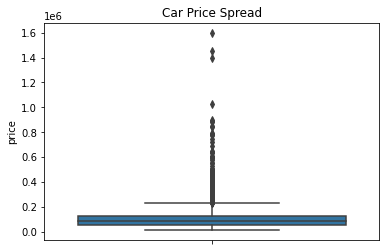

count    3.002000e+03
mean     1.114245e+05
std      1.067789e+05
min      1.000000e+04
25%      5.490000e+04
50%      8.790000e+04
75%      1.250000e+05
max      1.600000e+06
Name: price, dtype: float64


In [132]:
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)
plt.show()
print(cars.price.describe())

In [131]:
MaxPrice = cars['price'].sort_values(ascending=False).head(1)
MaxPrice 

index
1777    1600000
Name: price, dtype: int64

In [140]:

#Throwing extreme examples:
to_injection =int(cars.price.count() / 100)

#array of Index to drop:
ind = cars.sort_values(by = "price" , ascending=False).price.head(to_injection).index

for x in ind:
    cars.drop(index=x, inplace=True)
    

In [141]:
cars.sort_values(by = "price" , ascending=False).head(10)
#ניתן לראות שהרכבים היקרים ביותר קיצוניים מאוד במחיר ולכן נמחק את התוצאות הללו שלא מייצגות בכלל את הטבלה.

,version,CompanyName,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,...,is_private,next_test_in,annual_licensing_fee,car_length,size,large,small,mini,medium,price
index,,,,,,,,,,,,,,,,,,,,,
2901,אאודי Q8 LUXURY,אאודי,2019,0,0,0,0,0,0,0,...,1,1,4731,498.6,large,1,0,0,0,500000
2315,ב.מ.וו סדרה 5 530E M-SUPERIOR,ב.מ.וו,2021,0,0,0,0,0,0,0,...,1,3,4731,496.3,large,1,0,0,0,499000
1234,ב.מ.וו X5 SDRIVE 40I SUPERIOR,ב.מ.וו,2021,0,0,0,0,0,0,0,...,1,6,4731,492.2,large,1,0,0,0,499000
2302,מרצדס GLC 300E 4MATIC COUPE AMG,מרצדס,2021,0,0,0,0,0,0,0,...,1,2,4731,465.8,medium,0,0,0,1,485000
2005,מרצדס EQC 400 4MATIC AMG LINE,מרצדס,2021,0,0,0,0,0,0,0,...,1,2,4731,467.9,medium,0,0,0,1,485000
1395,מרצדס GLE 350 AMG LINE,מרצדס,2021,0,0,0,0,0,0,0,...,1,3,4731,492.4,large,1,0,0,0,480000
1291,קאדילאק אסקילייד P-LUXURY,קאדילאק,2019,0,0,0,0,0,0,0,...,1,2,4731,517.9,large,1,0,0,0,480000
2795,אאודי RSQ3 RS,אאודי,2021,0,0,0,0,0,0,0,...,1,7,4731,450.6,medium,0,0,0,1,479000
1423,ג'יפ רנגלר ETQ SPORT S SPORT,ג'יפ,2021,0,0,0,0,0,0,0,...,1,6,4731,488.2,large,1,0,0,0,475000


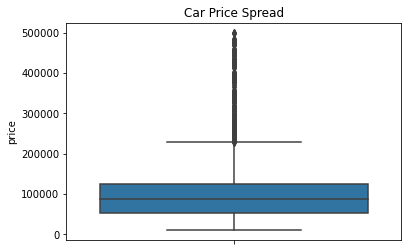

count      2972.000000
mean     104726.769515
std       79263.226220
min       10000.000000
25%       54000.000000
50%       86900.000000
75%      124000.000000
max      500000.000000
Name: price, dtype: float64


In [142]:
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)
plt.show()
print(cars.price.describe())